In [48]:
import bt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = bt.get('spy,agg', start='2010-01-01')
data.head()

,spy,agg
Date,,
2010-01-04,95.528107,82.540115
2010-01-05,95.780975,82.915596
2010-01-06,95.848396,82.867683
2010-01-07,96.253014,82.771812
2010-01-08,96.573311,82.819717


In [52]:
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [53]:
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

/home/shreya/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


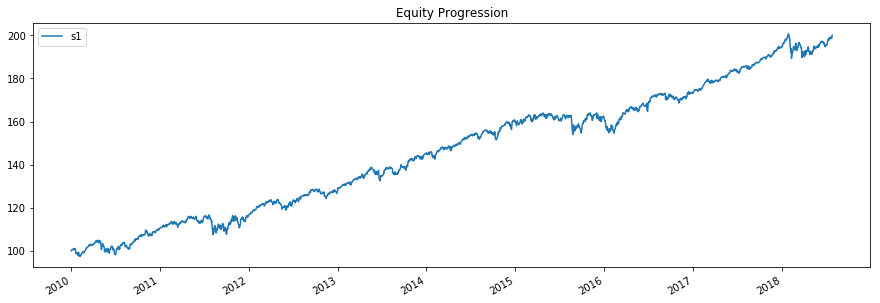

In [54]:
res.plot()

In [55]:
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2018-07-25
Risk-free rate       0.00%

Total Return         99.99%
Daily Sharpe         1.19
Daily Sortino        1.90
CAGR                 8.44%
Max Drawdown         -7.83%
Calmar Ratio         1.08

MTD                  2.33%
3m                   4.61%
6m                   0.15%
YTD                  2.88%
1Y                   7.92%
3Y (ann.)            7.45%
5Y (ann.)            7.67%
10Y (ann.)           8.44%
Since Incep. (ann.)  8.44%

Daily Sharpe         1.19
Daily Sortino        1.90
Daily Mean (ann.)    8.35%
Daily Vol (ann.)     7.01%
Daily Skew           -0.43
Daily Kurt           4.02
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.48
Monthly Sortino      3.23
Monthly Mean (ann.)  8.58%
Monthly Vol (ann.)   5.80%
Monthly Skew         -0.04
Monthly Kurt         0.38
Best Month           5.70%
Worst Month          -3.39%

Yearly Sharpe   

/home/shreya/.pyenv/versions/3.6.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


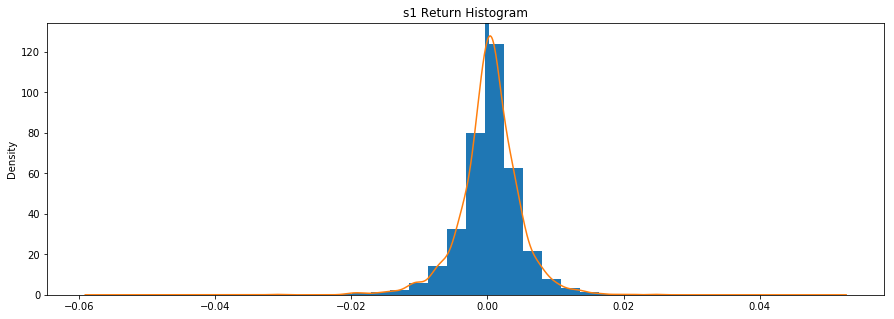

In [56]:
res.plot_histogram()

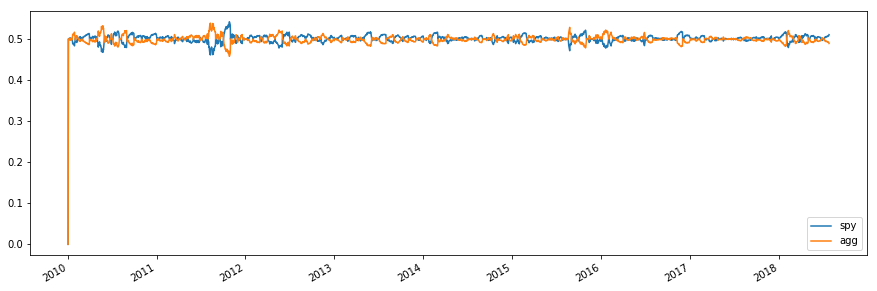

In [57]:
res.plot_security_weights()

s2
0% [############################# ] 100% | ETA: 00:00:00

/home/shreya/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


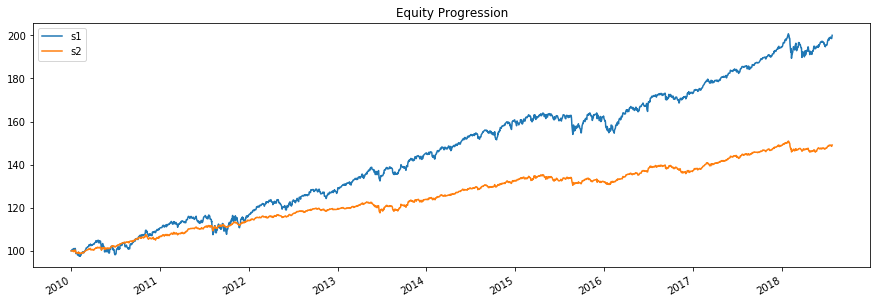

In [58]:
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])
test2 = bt.Backtest(s2, data)
res2 = bt.run(test, test2)

res2.plot()

In [59]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2018-07-25  2018-07-25
Risk-free rate       0.00%       0.00%

Total Return         99.99%      49.10%
Daily Sharpe         1.19        1.45
Daily Sortino        1.90        2.37
CAGR                 8.44%       4.78%
Max Drawdown         -7.83%      -4.07%
Calmar Ratio         1.08        1.18

MTD                  2.33%       0.94%
3m                   4.61%       2.29%
6m                   0.15%       -1.06%
YTD                  2.88%       0.14%
1Y                   7.92%       3.23%
3Y (ann.)            7.45%       3.83%
5Y (ann.)            7.67%       4.31%
10Y (ann.)           8.44%       4.78%
Since Incep. (ann.)  8.44%       4.78%

Daily Sharpe         1.19        1.45
Daily Sortino        1.90        2.37
Daily Mean (ann.)    8.35%       4.72%
Daily Vol (ann.)     7.01%       3.26%
Daily Skew           -0.43       -0.35
Daily Kurt  

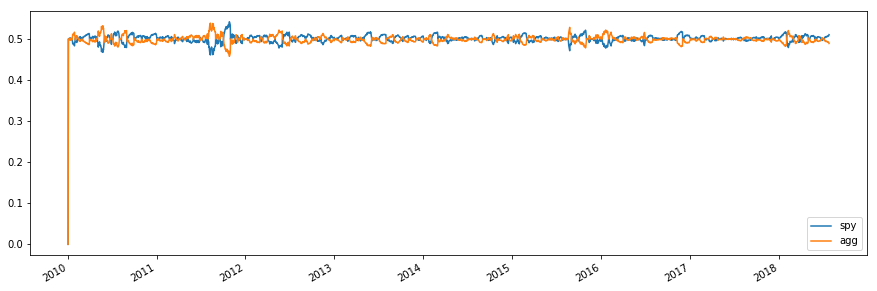

In [60]:
res2.plot_security_weights()

In [61]:
#SMA
data2= bt.get('aapl,msft,c,gs,ge', start='2010-01-01')
import pandas as pd
sma = data2.rolling(50).mean()

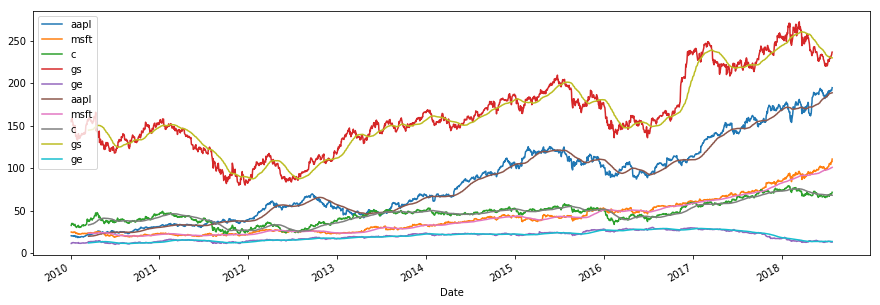

In [62]:
plot = bt.merge(data2, sma).plot(figsize=(15, 5))

In [63]:
class SelectWhere(bt.Algo):
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        if target.now in self.signal.index:
            sig = self.signal.ix[target.now]

            selected = list(sig.index[sig])

            target.temp['selected'] = selected

        
        return True

In [64]:
signal = data2 > sma

In [65]:
# first we create the Strategy
s = bt.Strategy('above50sma', [SelectWhere(data2 > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s, data2)

# and let's run it!
res2 = bt.run(t)

above50sma


/home/shreya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


0% [############################# ] 100% | ETA: 00:00:00

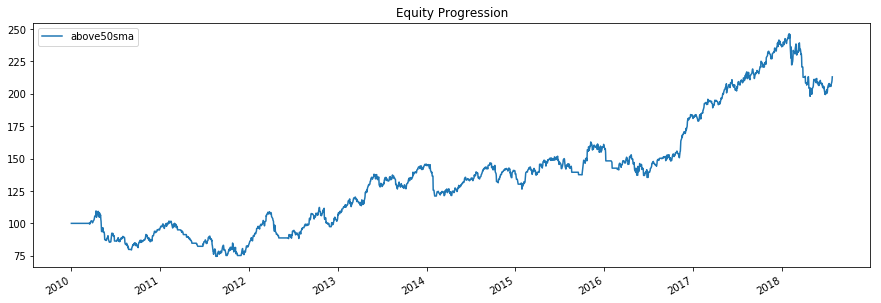

In [66]:
res2.plot()

In [67]:
res2.display()

Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2018-07-25
Risk-free rate       0.00%

Total Return         113.08%
Daily Sharpe         0.59
Daily Sortino        0.90
CAGR                 9.24%
Max Drawdown         -31.97%
Calmar Ratio         0.29

MTD                  6.19%
3m                   7.59%
6m                   -12.44%
YTD                  -9.82%
1Y                   0.42%
3Y (ann.)            14.54%
5Y (ann.)            9.82%
10Y (ann.)           9.24%
Since Incep. (ann.)  9.24%

Daily Sharpe         0.59
Daily Sortino        0.90
Daily Mean (ann.)    10.41%
Daily Vol (ann.)     17.66%
Daily Skew           -0.60
Daily Kurt           4.53
Best Day             5.78%
Worst Day            -7.99%

Monthly Sharpe       0.55
Monthly Sortino      0.92
Monthly Mean (ann.)  10.95%
Monthly Vol (ann.)   20.02%
Monthly Skew         -0.52
Monthly Kurt         0.59
Best Month           13.64%
Worst Month          -16